In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import json
import os
import torch
import pandas as pd
from utils import load, save, train, DataSet, save_model, load_model

In [2]:
params = dict()
params['DATA_DIR']='sample'
params['IMG_DIR'] = '../../data/images'
params['GPU_ID']='0' 
params['EMBEDDDIM'] = (100,200)
params['DATAFOLDS'] = 5
params['CUDA']=False 
params['WORKERS']=4
params['Z_DIM']=100
params['LR_DECAY_EPOCH']=20
params['STAGE']=1
params['IMGSIZE1']=64
params['IMGSIZE2']=255
params['MAX_EPOCH']=30
params['BATCH_SIZE']=64
params['SNAPSHOT_INTERVAL']=2
params['DISCRIMINATOR_LR']=0.002
params['GENERATOR_LR']=0.002
params['DF_DIM']=96
params['GF_DIM']=192
params['CONDITION_DIM'] = 128
params['DIMENSION']=1024
params['R_NUM'] = 4
params['STAGE1_G']='../output/coco_stageI/Model/netG_epoch_120.pth'
params['SAVE_MODEL'] = 'model'
params['LOG_DIR'] = 'logs'
args= params

In [3]:
if torch.cuda.is_available():
  device = torch.device('cuda:0')
  print('running on gpu...')
else:
  device = torch.device('cpu')
  print('running on cpu...')

running on cpu...


In [4]:
device.index

In [5]:
with open('modelpath.json','rb') as f:
    modelpath = json.load(f)
modelpath

{'gen1': 'model/202007140009/stage1/gen_1_26.pth',
 'dis1': 'model/202007140009/stage1/dis_1_26.pth',
 'gen2': '',
 'dis2': ''}

# Stage 1

In [6]:
ds = DataSet(args)
dl = torch.utils.data.DataLoader(ds,batch_size=args['BATCH_SIZE'],shuffle=True,num_workers=4)

In [7]:
gen, dis = train(dl,args,path=modelpath)

#######
#   Running epoch:0...
#######################

Currently running batch 0
Currently running batch 1
Currently running batch 2
Currently running batch 3
Currently running batch 4
Currently running batch 5
Currently running batch 6
Currently running batch 7
  3%|▎         | 1/30 [01:59<57:36, 119.21s/it]
########################################################################
#   Model for stage 1 for epoch 0 saved at model/202007140009/stage1...
########################################################################


#####################################################################
#   Epoch:0,   G_loss:2036984340021282.5,   D_loss:32.21442911028862
#####################################################################


#######################
#   Running epoch:1...
#######################

Currently running batch 0
Currently running batch 1
Currently running batch 2
Currently running batch 3
Currently running batch 4
Currently running batch 5
Currently running batch 6
Cur

In [5]:
save_model(gen, dis, args, args['MAX_EPOCH'])


#####################################################
#   Model for stage 1 for epoch 10 saved at model...
#####################################################



# Stage 2

In [14]:
params['STAGE']=2
params['BATCH_SIZE']=16
args= params

In [15]:
ds = DataSet(args)
dl = torch.utils.data.DataLoader(ds,batch_size=args['BATCH_SIZE'],shuffle=True,num_workers=4)

In [19]:
gen, dis = train(dl,args,modelpath)

# Vizualization

In [19]:
with open('modelpath.json','rb') as f:
    modelpath = json.load(f)
modelpath

{'gen1': 'model/202007132220/stage1/gen_1_29.pth',
 'dis1': 'model/202007132220/stage1/dis_1_29.pth',
 'gen2': '',
 'dis2': ''}

## S1

In [6]:
import matplotlib.pyplot as plt

In [44]:
gen, dis = load_model(args,1,modelpath)


In [45]:
for i, data in enumerate(dl):
    if i == 2:
        break
noise = torch.randn(data[0].shape[0], args['Z_DIM'])

In [46]:
_, img, _, _ = gen.eval(data[0],data[1],noise)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


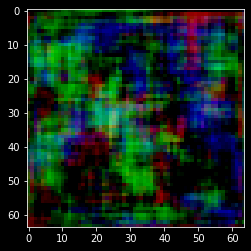

In [47]:
plt.imshow(np.moveaxis(img[0].detach().numpy(),0,2))

In [48]:
import cv2 as cv
for i in range(len(img)):
    new = (1/(2*2.25)) * np.moveaxis(img[i].detach().numpy(),0,2) + 0.5
    plt.imsave('sample/generated/'+str(i)+'.png',new)


## S2

In [20]:
gen2, dis2 = load_model(args,2,modelpath)

In [21]:
ds = DataSet(args)
dl = torch.utils.data.DataLoader(ds,batch_size=10,shuffle=True,num_workers=4)

In [22]:
for i, data in enumerate(dl):
    break
noise = torch.randn(data[0].shape[0], args['Z_DIM'])

In [23]:
_, img, _, _ = gen2.eval(data[0],data[1],noise)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


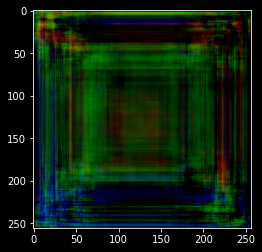

In [24]:
plt.imshow(np.moveaxis(img[4].detach().numpy(),0,2))

In [25]:
for i in range(len(img)):
    new = (1/(2*2.25)) * np.moveaxis(img[i].detach().numpy(),0,2) + 0.5
    plt.imsave('sample/generated/'+str(i)+'.png',new)